In [ ]:
<a href="https://colab.research.google.com/github/Jeremstar/Projet-de-DINGUE/blob/main/code_test_stat_des.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Ce code permet d'obtenir, à partir des données brutes scrapées et du tableau des scores, un dataframe complet et nettoyé
#pour pouvoir mener ensuite le traitement statistique. 
#La première partie du Notebook copie la méthode d'extraction des données du site IMDb pour pouvoir progresser dans le code
#en le testant au fur et à mesure sur une base plus petite (60 films)

#Note : à la fin on doit obtenir un nouveau dataframe à faire figurer dans le dossier avec celui contenant les données brutes

In [2]:
# -*- coding: utf-8 -*-

"""

Created on Fri Nov 18 10:13:24 2022



@author: jbornet

"""



#ON VA DABORD CREER UNE DATABASE GRANDE SANS BUDGET PUIS PETITE AVEC

import pandas as pd

movies_rating = pd.read_csv("https://datasets.imdbws.com/title.ratings.tsv.gz")

movies_rating_beau = movies_rating["tconst\taverageRating\tnumVotes"].str.split("\\t", expand=True)

movies_rating_beau.columns = ['ID', 'Note_moyenne', 'Nombre_de_votes']

movies_rating_beau['Note_moyenne'] = movies_rating_beau['Note_moyenne'].astype(float)

movies_rating_beau['Nombre_de_votes'] = movies_rating_beau['Nombre_de_votes'].astype(float)

movies_rating_épuré = movies_rating_beau[movies_rating_beau.Nombre_de_votes > 1999]

In [3]:
#contentrating c'est classification d'age ; creator c'est la société de production

df = pd.DataFrame(columns=['ID', 'name', 'alternateName', 'url', 'contentRating', 'datePublished', 'genre', 'actor', 'director', 'creator', 'Origine', 'Budget', 'duration', 'keywords'])



from bs4 import BeautifulSoup as bs

import requests

from random import seed

import time

import json

import re

from google.colab import files

In [4]:
#liste des objets inutiles dans le scrap des pages ; je retire aussi le contenu du df qu'on a déjà (les votes)

superflu = ["@context", "@type", "image", "description", "review", "trailer", "aggregateRating"]

#pour tej les images des scénaristes etc

superflu2 = ['@type', 'url']

session_obj = requests.Session()


In [5]:
#on boucle sur chaque film qu'on considère

compteur = 0

for ID in movies_rating_épuré.head(60)['ID'] :

    compteur = compteur+1

    print(compteur)

    try:

      time.sleep(0.01)

      url_temp = 'https://www.imdb.com/title/'+ID+'/'

      response=session_obj.get(url_temp, headers={"User-Agent": "Mozilla/5.0"})

      html = response.content

      soup = bs(html, "lxml")


#Ça c'est le dictionnaire complet de tout ce qui est aspirable

      bloc = soup.find("script", type="application/ld+json").string

      dictio = json.loads(bloc)


#on retire dedans ce qui nous intéresse pas

      for inutile in superflu :

        dictio.pop(inutile, None)



#on ajoute une ligne budget illico presto

      liste_budg = soup.find_all("label", class_="ipc-metadata-list-item__list-content-item")

      if len(liste_budg) >= 3 and '$' in liste_budg[2] :

        budget = liste_budg[2].string

        if budget == None :

          budget = "Non renseigné"

        else :

          budget = "".join([elemnt for elemnt in budget if elemnt.isdigit()])

        dictio['Budget'] = budget



#on gère les dictionnaires relou pour garder que le nom des personnes


      if 'actor' in dictio :

        for acteur in dictio['actor'] :

          for inutile in superflu2 :

            acteur.pop(inutile, None)

        for indice, nom in enumerate(dictio['actor']) :

          dictio['actor'][indice] = nom['name']



      if 'director' in dictio :

        for directeur in dictio['director'] :

          for inutile in superflu2 :

            directeur.pop(inutile, None)

        for indice, nom in enumerate(dictio['director']) :

          dictio['director'][indice] = nom['name']
  

#pour la société de prod c'est compliqué, ya que une url qui fait ouvrir une page de imdb pro

#d'ailleurs le nom de la société c'est une info qu'on peut pas obtenir autrement

#je pense qu'on peut trifouiller pour l'avoir sans payer mais là faut se contenter de l'url

#UPDATE : c bon on a le nom

      if 'creator' in dictio :

        for createur in dictio['creator'] :

          createur.pop('@type', None)

        for indice, url in enumerate(dictio['creator']) :

          dictio['creator'][indice] = url['url']









#on ajoute au dictionnaire le pays d'origine ; on le trouve dans la date de sortie

      date_sortie_soup = soup.find("a", class_="ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link", href="/title/"+ID+"/releaseinfo?ref_=tt_dt_rdat")

      if date_sortie_soup == None :

        date_sortieV2 = "Non renseigné"

        pays = "Non renseigné"

      else :

        date_sortieV2 = date_sortie_soup.string

        b1 = date_sortieV2.find('(')

        b2 = date_sortieV2.find(')')

        pays = date_sortieV2[b1:b2]

        pays=pays[1:]

      dictio['Origine'] = pays



      df = df.append(dictio, ignore_index=True)

    
    except:

      print('Erreur au rang : '+str(compteur))


sauvegarde_imdb = df.to_csv('IMDB_2000votes.csv', index = True)


df


#https://ledatascientist.com/creer-un-modele-de-regression-lineaire-avec-python/

#faudra pas oublier de fusionner avec l'autre df (movies_rating_épuré) pour obtenir ID et infos sur les votes

#faudra aussi construire une fonction propre de scrap


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


,ID,name,alternateName,url,contentRating,datePublished,genre,actor,director,creator,Origine,Budget,duration,keywords
0,NaN,Blacksmith Scene,NaN,/title/tt0000005/,Unrated,1893-05-09,"[Short, Comedy]","[Charles Kayser, John Ott]",[William K.L. Dickson],[/company/co0037035/],United States,NaN,PT1M,"blacksmith,national film registry,beer,two wor..."
1,NaN,Edison Kinetoscopic Record of a Sneeze,NaN,/title/tt0000008/,NaN,1894-01-09,"[Documentary, Short]",[Fred Ott],[William K.L. Dickson],[/company/co0037035/],United States,NaN,PT1M,"national film registry,year 1894,1890s,19th ce..."
2,NaN,La sortie de l&apos;usine Lumière à Lyon,Leaving the Factory,/title/tt0000010/,Not Rated,1895-03-22,"[Documentary, Short]",NaN,[Louis Lumière],[/company/co0014436/],France,NaN,PT1M,"reference to lumiere brothers,reference to the..."
3,NaN,L&apos;arrivée d&apos;un train à La Ciotat,The Arrival of a Train,/title/tt0000012/,Not Rated,1896-06-30,"[Documentary, Short]","[Madeleine Koehler, Marcel Koehler, Mrs. Augus...","[Auguste Lumière, Louis Lumière]",[/company/co0014436/],United States,NaN,PT1M,"actuality film,year 1896,train,train station,1..."
4,NaN,L&apos;arroseur arrosé,The Waterer Watered,/title/tt0000014/,Not Rated,NaN,"[Short, Comedy]","[François Clerc, Benoît Duval]",[Louis Lumière],"[/company/co0014436/, /company/co0059061/]",Finland,NaN,PT1M,"gardener,boy,water,hose,spanking"
5,NaN,Repas de bébé,Baby&apos;s Meal,/title/tt0000029/,NaN,NaN,"[Documentary, Short]","[Auguste Lumière, Mrs. Auguste Lumiere, Andrée...",[Louis Lumière],[/company/co0014436/],Uruguay,NaN,PT1M,"family man,breakfast,feeding,daughter,cracker"
6,NaN,Démolition d&apos;un mur,Demolition of a Wall,/title/tt0000070/,Not Rated,1896-03-06,"[Documentary, Short]",[Auguste Lumière],[Louis Lumière],[/company/co0014436/],France,NaN,PT1M,"year 1896,demolition,1890s,19th century"
7,NaN,Le manoir du diable,The House of the Devil,/title/tt0000091/,Not Rated,1896-12-24,"[Short, Horror]","[Jehanne d&apos;Alcy, Jules-Eugène Legris, Geo...",[Georges Méliès],"[/company/co0023239/, /company/co0015284/, /na...",France,NaN,PT3M,"vampire,monster,supernatural power,psychotroni..."
8,NaN,La lune à un mètre,"The Astronomer&apos;s Dream; or, the Man in th...",/title/tt0000211/,Not Rated,NaN,"[Short, Comedy, Fantasy]","[Jehanne d&apos;Alcy, Georges Méliès]",[Georges Méliès],"[/company/co0023239/, /company/co0015284/, /na...",France,NaN,PT3M,"observatory,desk,demon,fairy,queen"
9,NaN,L&apos;homme à la tête en caoutchouc,NaN,/title/tt0000359/,NaN,NaN,"[Short, Comedy, Fantasy]",[Georges Méliès],[Georges Méliès],[/company/co0015284/],France,NaN,PT3M,"chemist,rubber,trick photography,trick film,mi..."


In [ ]:
df

In [ ]:
#movies_rating_épuré.head(100)

In [6]:
movies_rating_épuré['url']='/title/'+movies_rating_épuré['ID']+'/'

<ipython-input-6-d7ed2dc33047>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_rating_épuré['url']='/title/'+movies_rating_épuré['ID']+'/'


In [7]:
df_ratings = df.merge(movies_rating_épuré, on='url',how='left')
df_ratings

,ID_x,name,alternateName,url,contentRating,datePublished,genre,actor,director,creator,Origine,Budget,duration,keywords,ID_y,Note_moyenne,Nombre_de_votes
0,NaN,Blacksmith Scene,NaN,/title/tt0000005/,Unrated,1893-05-09,"[Short, Comedy]","[Charles Kayser, John Ott]",[William K.L. Dickson],[/company/co0037035/],United States,NaN,PT1M,"blacksmith,national film registry,beer,two wor...",tt0000005,6.2,2553.0
1,NaN,Edison Kinetoscopic Record of a Sneeze,NaN,/title/tt0000008/,NaN,1894-01-09,"[Documentary, Short]",[Fred Ott],[William K.L. Dickson],[/company/co0037035/],United States,NaN,PT1M,"national film registry,year 1894,1890s,19th ce...",tt0000008,5.4,2068.0
2,NaN,La sortie de l&apos;usine Lumière à Lyon,Leaving the Factory,/title/tt0000010/,Not Rated,1895-03-22,"[Documentary, Short]",NaN,[Louis Lumière],[/company/co0014436/],France,NaN,PT1M,"reference to lumiere brothers,reference to the...",tt0000010,6.9,6990.0
3,NaN,L&apos;arrivée d&apos;un train à La Ciotat,The Arrival of a Train,/title/tt0000012/,Not Rated,1896-06-30,"[Documentary, Short]","[Madeleine Koehler, Marcel Koehler, Mrs. Augus...","[Auguste Lumière, Louis Lumière]",[/company/co0014436/],United States,NaN,PT1M,"actuality film,year 1896,train,train station,1...",tt0000012,7.4,11999.0
4,NaN,L&apos;arroseur arrosé,The Waterer Watered,/title/tt0000014/,Not Rated,NaN,"[Short, Comedy]","[François Clerc, Benoît Duval]",[Louis Lumière],"[/company/co0014436/, /company/co0059061/]",Finland,NaN,PT1M,"gardener,boy,water,hose,spanking",tt0000014,7.1,5380.0
5,NaN,Repas de bébé,Baby&apos;s Meal,/title/tt0000029/,NaN,NaN,"[Documentary, Short]","[Auguste Lumière, Mrs. Auguste Lumiere, Andrée...",[Louis Lumière],[/company/co0014436/],Uruguay,NaN,PT1M,"family man,breakfast,feeding,daughter,cracker",tt0000029,5.9,3293.0
6,NaN,Démolition d&apos;un mur,Demolition of a Wall,/title/tt0000070/,Not Rated,1896-03-06,"[Documentary, Short]",[Auguste Lumière],[Louis Lumière],[/company/co0014436/],France,NaN,PT1M,"year 1896,demolition,1890s,19th century",tt0000070,6.4,2594.0
7,NaN,Le manoir du diable,The House of the Devil,/title/tt0000091/,Not Rated,1896-12-24,"[Short, Horror]","[Jehanne d&apos;Alcy, Jules-Eugène Legris, Geo...",[Georges Méliès],"[/company/co0023239/, /company/co0015284/, /na...",France,NaN,PT3M,"vampire,monster,supernatural power,psychotroni...",tt0000091,6.7,3558.0
8,NaN,La lune à un mètre,"The Astronomer&apos;s Dream; or, the Man in th...",/title/tt0000211/,Not Rated,NaN,"[Short, Comedy, Fantasy]","[Jehanne d&apos;Alcy, Georges Méliès]",[Georges Méliès],"[/company/co0023239/, /company/co0015284/, /na...",France,NaN,PT3M,"observatory,desk,demon,fairy,queen",tt0000211,7.4,4247.0
9,NaN,L&apos;homme à la tête en caoutchouc,NaN,/title/tt0000359/,NaN,NaN,"[Short, Comedy, Fantasy]",[Georges Méliès],[Georges Méliès],[/company/co0015284/],France,NaN,PT3M,"chemist,rubber,trick photography,trick film,mi...",tt0000359,7.1,2918.0


In [8]:
df_ratings_test = df_ratings.copy()
df_ratings_test

,ID_x,name,alternateName,url,contentRating,datePublished,genre,actor,director,creator,Origine,Budget,duration,keywords,ID_y,Note_moyenne,Nombre_de_votes
0,NaN,Blacksmith Scene,NaN,/title/tt0000005/,Unrated,1893-05-09,"[Short, Comedy]","[Charles Kayser, John Ott]",[William K.L. Dickson],[/company/co0037035/],United States,NaN,PT1M,"blacksmith,national film registry,beer,two wor...",tt0000005,6.2,2553.0
1,NaN,Edison Kinetoscopic Record of a Sneeze,NaN,/title/tt0000008/,NaN,1894-01-09,"[Documentary, Short]",[Fred Ott],[William K.L. Dickson],[/company/co0037035/],United States,NaN,PT1M,"national film registry,year 1894,1890s,19th ce...",tt0000008,5.4,2068.0
2,NaN,La sortie de l&apos;usine Lumière à Lyon,Leaving the Factory,/title/tt0000010/,Not Rated,1895-03-22,"[Documentary, Short]",NaN,[Louis Lumière],[/company/co0014436/],France,NaN,PT1M,"reference to lumiere brothers,reference to the...",tt0000010,6.9,6990.0
3,NaN,L&apos;arrivée d&apos;un train à La Ciotat,The Arrival of a Train,/title/tt0000012/,Not Rated,1896-06-30,"[Documentary, Short]","[Madeleine Koehler, Marcel Koehler, Mrs. Augus...","[Auguste Lumière, Louis Lumière]",[/company/co0014436/],United States,NaN,PT1M,"actuality film,year 1896,train,train station,1...",tt0000012,7.4,11999.0
4,NaN,L&apos;arroseur arrosé,The Waterer Watered,/title/tt0000014/,Not Rated,NaN,"[Short, Comedy]","[François Clerc, Benoît Duval]",[Louis Lumière],"[/company/co0014436/, /company/co0059061/]",Finland,NaN,PT1M,"gardener,boy,water,hose,spanking",tt0000014,7.1,5380.0
5,NaN,Repas de bébé,Baby&apos;s Meal,/title/tt0000029/,NaN,NaN,"[Documentary, Short]","[Auguste Lumière, Mrs. Auguste Lumiere, Andrée...",[Louis Lumière],[/company/co0014436/],Uruguay,NaN,PT1M,"family man,breakfast,feeding,daughter,cracker",tt0000029,5.9,3293.0
6,NaN,Démolition d&apos;un mur,Demolition of a Wall,/title/tt0000070/,Not Rated,1896-03-06,"[Documentary, Short]",[Auguste Lumière],[Louis Lumière],[/company/co0014436/],France,NaN,PT1M,"year 1896,demolition,1890s,19th century",tt0000070,6.4,2594.0
7,NaN,Le manoir du diable,The House of the Devil,/title/tt0000091/,Not Rated,1896-12-24,"[Short, Horror]","[Jehanne d&apos;Alcy, Jules-Eugène Legris, Geo...",[Georges Méliès],"[/company/co0023239/, /company/co0015284/, /na...",France,NaN,PT3M,"vampire,monster,supernatural power,psychotroni...",tt0000091,6.7,3558.0
8,NaN,La lune à un mètre,"The Astronomer&apos;s Dream; or, the Man in th...",/title/tt0000211/,Not Rated,NaN,"[Short, Comedy, Fantasy]","[Jehanne d&apos;Alcy, Georges Méliès]",[Georges Méliès],"[/company/co0023239/, /company/co0015284/, /na...",France,NaN,PT3M,"observatory,desk,demon,fairy,queen",tt0000211,7.4,4247.0
9,NaN,L&apos;homme à la tête en caoutchouc,NaN,/title/tt0000359/,NaN,NaN,"[Short, Comedy, Fantasy]",[Georges Méliès],[Georges Méliès],[/company/co0015284/],France,NaN,PT3M,"chemist,rubber,trick photography,trick film,mi...",tt0000359,7.1,2918.0


In [14]:
#RECODAGE TIME

#déjà, les titres des films, à réécrire avec les apostrophes

df_ratings_test['name'] = df_ratings_test['name'].str.replace("&apos;", "'", case = False)
df_ratings_test['alternateName'] = df_ratings_test['alternateName'].str.replace("&apos;", "'", case = False)
df_ratings_test

,ID_x,name,alternateName,url,contentRating,datePublished,genre,actor,director,creator,Origine,Budget,duration,keywords,ID_y,Note_moyenne,Nombre_de_votes
0,NaN,Blacksmith Scene,NaN,/title/tt0000005/,Unrated,1893-05-09,"[Short, Comedy]","[Charles Kayser, John Ott]",[William K.L. Dickson],[/company/co0037035/],United States,NaN,PT1M,"blacksmith,national film registry,beer,two wor...",tt0000005,6.2,2553.0
1,NaN,Edison Kinetoscopic Record of a Sneeze,NaN,/title/tt0000008/,NaN,1894-01-09,"[Documentary, Short]",[Fred Ott],[William K.L. Dickson],[/company/co0037035/],United States,NaN,PT1M,"national film registry,year 1894,1890s,19th ce...",tt0000008,5.4,2068.0
2,NaN,La sortie de l'usine Lumière à Lyon,Leaving the Factory,/title/tt0000010/,Not Rated,1895-03-22,"[Documentary, Short]",NaN,[Louis Lumière],[/company/co0014436/],France,NaN,PT1M,"reference to lumiere brothers,reference to the...",tt0000010,6.9,6990.0
3,NaN,L'arrivée d'un train à La Ciotat,The Arrival of a Train,/title/tt0000012/,Not Rated,1896-06-30,"[Documentary, Short]","[Madeleine Koehler, Marcel Koehler, Mrs. Augus...","[Auguste Lumière, Louis Lumière]",[/company/co0014436/],United States,NaN,PT1M,"actuality film,year 1896,train,train station,1...",tt0000012,7.4,11999.0
4,NaN,L'arroseur arrosé,The Waterer Watered,/title/tt0000014/,Not Rated,NaN,"[Short, Comedy]","[François Clerc, Benoît Duval]",[Louis Lumière],"[/company/co0014436/, /company/co0059061/]",Finland,NaN,PT1M,"gardener,boy,water,hose,spanking",tt0000014,7.1,5380.0
5,NaN,Repas de bébé,Baby's Meal,/title/tt0000029/,NaN,NaN,"[Documentary, Short]","[Auguste Lumière, Mrs. Auguste Lumiere, Andrée...",[Louis Lumière],[/company/co0014436/],Uruguay,NaN,PT1M,"family man,breakfast,feeding,daughter,cracker",tt0000029,5.9,3293.0
6,NaN,Démolition d'un mur,Demolition of a Wall,/title/tt0000070/,Not Rated,1896-03-06,"[Documentary, Short]",[Auguste Lumière],[Louis Lumière],[/company/co0014436/],France,NaN,PT1M,"year 1896,demolition,1890s,19th century",tt0000070,6.4,2594.0
7,NaN,Le manoir du diable,The House of the Devil,/title/tt0000091/,Not Rated,1896-12-24,"[Short, Horror]","[Jehanne d&apos;Alcy, Jules-Eugène Legris, Geo...",[Georges Méliès],"[/company/co0023239/, /company/co0015284/, /na...",France,NaN,PT3M,"vampire,monster,supernatural power,psychotroni...",tt0000091,6.7,3558.0
8,NaN,La lune à un mètre,"The Astronomer's Dream; or, the Man in the Moon",/title/tt0000211/,Not Rated,NaN,"[Short, Comedy, Fantasy]","[Jehanne d&apos;Alcy, Georges Méliès]",[Georges Méliès],"[/company/co0023239/, /company/co0015284/, /na...",France,NaN,PT3M,"observatory,desk,demon,fairy,queen",tt0000211,7.4,4247.0
9,NaN,L'homme à la tête en caoutchouc,NaN,/title/tt0000359/,NaN,NaN,"[Short, Comedy, Fantasy]",[Georges Méliès],[Georges Méliès],[/company/co0015284/],France,NaN,PT3M,"chemist,rubber,trick photography,trick film,mi...",tt0000359,7.1,2918.0


In [9]:
df_ratings_test.dtypes

ID_x                object
name                object
alternateName       object
url                 object
contentRating       object
datePublished       object
genre               object
actor               object
director            object
creator             object
Origine             object
Budget              object
duration            object
keywords            object
ID_y                object
Note_moyenne       float64
Nombre_de_votes    float64
dtype: object

In [32]:
#recodage du mois de 1 à 12
df_ratings_test['month'] = pd.DatetimeIndex(df_ratings_test['datePublished']).month
df_ratings_test

,ID_x,name,alternateName,url,contentRating,datePublished,genre,actor,director,creator,Origine,Budget,duration,keywords,ID_y,Note_moyenne,Nombre_de_votes,month
0,NaN,Blacksmith Scene,NaN,/title/tt0000005/,Unrated,1893-05-09,"[Short, Comedy]","[Charles Kayser, John Ott]",[William K.L. Dickson],[/company/co0037035/],United States,NaN,PT1M,"blacksmith,national film registry,beer,two wor...",tt0000005,6.2,2553.0,5.0
1,NaN,Edison Kinetoscopic Record of a Sneeze,NaN,/title/tt0000008/,NaN,1894-01-09,"[Documentary, Short]",[Fred Ott],[William K.L. Dickson],[/company/co0037035/],United States,NaN,PT1M,"national film registry,year 1894,1890s,19th ce...",tt0000008,5.4,2068.0,1.0
2,NaN,La sortie de l&apos;usine Lumière à Lyon,Leaving the Factory,/title/tt0000010/,Not Rated,1895-03-22,"[Documentary, Short]",NaN,[Louis Lumière],[/company/co0014436/],France,NaN,PT1M,"reference to lumiere brothers,reference to the...",tt0000010,6.9,6990.0,3.0
3,NaN,L&apos;arrivée d&apos;un train à La Ciotat,The Arrival of a Train,/title/tt0000012/,Not Rated,1896-06-30,"[Documentary, Short]","[Madeleine Koehler, Marcel Koehler, Mrs. Augus...","[Auguste Lumière, Louis Lumière]",[/company/co0014436/],United States,NaN,PT1M,"actuality film,year 1896,train,train station,1...",tt0000012,7.4,11999.0,6.0
4,NaN,L&apos;arroseur arrosé,The Waterer Watered,/title/tt0000014/,Not Rated,NaN,"[Short, Comedy]","[François Clerc, Benoît Duval]",[Louis Lumière],"[/company/co0014436/, /company/co0059061/]",Finland,NaN,PT1M,"gardener,boy,water,hose,spanking",tt0000014,7.1,5380.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,NaN,Die Puppe,The Doll,/title/tt0010600/,Not Rated,1921-05-01,"[Comedy, Fantasy, Sci-Fi]","[Ossi Oswalda, Hermann Thimig, Victor Janson]",[Ernst Lubitsch],"[/company/co0035583/, /name/nm0006782/, /name/...",United States,NaN,PT1H6M,"two word title,copy,walking on roof,child born...",tt0010600,7.4,2151.0,5.0
116,NaN,Sunnyside,NaN,/title/tt0010747/,NaN,1919-06-15,"[Comedy, Short]","[Charles Chaplin, Edna Purviance, Olive Ann Al...",[Charles Chaplin],"[/company/co0041460/, /name/nm0000122/]",United States,NaN,PT34M,"cow,bread,coffee,sugar,sugar cube",tt0010747,6.7,3111.0,6.0
117,NaN,Convict 13,NaN,/title/tt0011071/,Not Rated,1920-10-27,"[Short, Comedy, Crime]","[Buster Keaton, Sybil Seely, Joe Roberts]","[Edward F. Cline, Buster Keaton]","[/company/co0000357/, /name/nm0166836/, /name/...",United States,NaN,PT19M,"rockpile,visual gag,chase,comic hero,comic vio...",tt0011071,7.1,3208.0,10.0
118,NaN,Dr. Jekyll and Mr. Hyde,NaN,/title/tt0011130/,Unrated,1920-09-28,"[Drama, Horror, Sci-Fi]","[John Barrymore, Martha Mansfield, Brandon Hurst]",[John S. Robertson],"[/company/co0023400/, /name/nm0829044/, /name/...",Denmark,NaN,PT1H9M,"self experimentation,mutation,physical deterio...",tt0011130,6.9,5557.0,9.0


In [15]:
import numpy as np
#SCORE ACTEURS

#Pour chaque film i :
#	Pour chaque acteur_k :
#Notes_films_ant = np.array(note_fim_j for j in liste_films if date_film_j < date_film_i and acteur_k in acteurs_film_j)
#		Note_acteur = mean(Notes_films_ant)
#	Liste_notes_acteurs.append(note_acteur)

score_acteurs = []

for i in range(len(df_ratings_test['ID_y'])) :
  score_acteurs_film =[]
 # if df_ratings_test.isna(df_ratings_test.iloc[df_ratings_test.index[i],'actor']) :
  if df_ratings_test['actor'].isna()[i] :
    score_acteurs_film.append(None)
  else :
    for acteur in df_ratings_test.loc[df_ratings_test.index[i],'actor'] :
      notes_films_ant = np.array(df_ratings_test.loc[df_ratings_test.index[j],'Note_moyenne'] for j in range(len(df_ratings_test['ID_x'])) if df_ratings_test.loc[df_ratings_test.index[j],'datePublished']<df_ratings_test.loc[df_ratings_test.index[i],'datePublished'] and acteur in df_ratings_test.loc[df_ratings_test.index[j],'actor'])
      score_acteurs_film = score_acteurs_film.append(np.mean(notes_films_ant))
  score_acteurs = score_acteurs.append(score_acteurs_film)

df_ratings_test['score_acteurs'] = score_acteurs


df_ratings_test

#se demander ce qu'aura l'acteur comme note avant son 1er film !



TypeError: ignored

In [33]:
#STAT DES

df_ratings_test.describe()

,Note_moyenne,Nombre_de_votes,month
count,120.000000,120.000000,106.000000
mean,6.891667,6452.616667,7.339623
std,0.561598,10513.226960,3.441724
min,5.400000,2012.000000,1.000000
25%,6.575000,2541.750000,4.000000
50%,6.900000,3335.000000,8.000000
75%,7.300000,5089.750000,10.000000
max,8.200000,64762.000000,12.000000


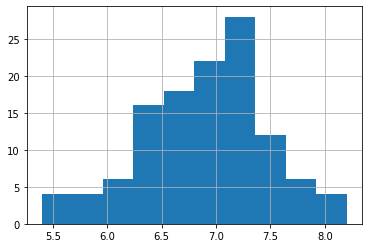

In [34]:
df_ratings_test['Note_moyenne'].hist()

In [35]:
df_ratings_test.groupby('Origine').mean()

,Note_moyenne,Nombre_de_votes,month
Origine,,,
Denmark,6.900000,5557.000000,9.000000
Finland,7.100000,5380.000000,NaN
France,6.900000,3810.166667,6.500000
Germany,7.600000,33387.000000,4.000000
Russia,7.700000,2950.000000,10.000000
United States,6.860417,5840.458333,7.466667
Uruguay,5.900000,3293.000000,NaN


In [36]:
df_ratings_test.groupby('month').mean()

,Note_moyenne,Nombre_de_votes
month,,
1.0,5.400000,2068.000000
2.0,6.675000,18856.750000
3.0,6.520000,8285.000000
4.0,7.250000,4496.750000
5.0,6.825000,2704.500000
6.0,7.185714,7433.857143
7.0,6.900000,2948.000000
8.0,6.866667,2661.000000
9.0,6.800000,3398.000000


In [37]:
df_ratings_test.groupby(['month','Origine']).mean()

Note_moyenne  Nombre_de_votes
month Origine                                     
1.0   United States      5.400000      2068.000000
2.0   Germany            8.000000     64762.000000
      United States      6.233333      3555.000000
3.0   France             6.650000      4792.000000
      United States      6.433333     10613.666667
4.0   United States      7.250000      4496.750000
5.0   United States      6.825000      2704.500000
6.0   Germany            7.200000      2012.000000
      United States      7.183333      8337.500000
7.0   United States      6.900000      2948.000000
8.0   France             6.900000      2554.000000
      United States      6.850000      2714.500000
9.0   Denmark            6.900000      5557.000000
      United States      6.750000      2318.500000
10.0  Russia             7.700000      2950.000000
      United States      7.166667      9711.111111
11.0  United States      6.866667      3330.666667
12.0  France             6.700000      3558.000000
      United States      6.771429      5555.571429